In [ ]:
'''
data link:
https://www.kaggle.com/datasets/gyanprakashkushwaha/laptop-price-prediction-cleaned-dataset
'''

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as pt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
import numpy as np

In [2]:
data=pd.read_csv("laptop_data_cleaned.csv")
data.head(5)

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [4]:
string=data.select_dtypes(include='O')
number=data.select_dtypes(include='number')

In [5]:
#check the nan in data
na=data.isnull().sum()*100/len(data)
na.sort_values(ascending=True)

Company        0.0
TypeName       0.0
Ram            0.0
Weight         0.0
Price          0.0
TouchScreen    0.0
Ips            0.0
Ppi            0.0
Cpu_brand      0.0
HDD            0.0
SSD            0.0
Gpu_brand      0.0
Os             0.0
dtype: float64

In [6]:
data[number.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Ram,1273.0,8.447761,5.098771,2.000000,4.000000,8.000000,8.000000,64.000000
Weight,1273.0,2.041100,0.669241,0.690000,1.500000,2.040000,2.310000,4.700000
Price,1273.0,10.828218,0.619565,9.134616,10.387379,10.872255,11.287447,12.691441
TouchScreen,1273.0,0.146897,0.354142,0.000000,0.000000,0.000000,0.000000,1.000000
Ips,1273.0,0.279654,0.449006,0.000000,0.000000,0.000000,1.000000,1.000000
Ppi,1273.0,146.950812,42.926775,90.583402,127.335675,141.211998,157.350512,352.465147
HDD,1273.0,413.715632,518.054486,0.000000,0.000000,0.000000,1000.000000,2000.000000
SSD,1273.0,186.252946,186.531571,0.000000,0.000000,256.000000,256.000000,1024.000000


In [7]:
data[string.columns].describe().T

,count,unique,top,freq
Company,1273,19,Dell,291
TypeName,1273,6,Notebook,706
Cpu_brand,1273,5,Intel Core i7,515
Gpu_brand,1273,3,Intel,703
Os,1273,3,Windows,1100


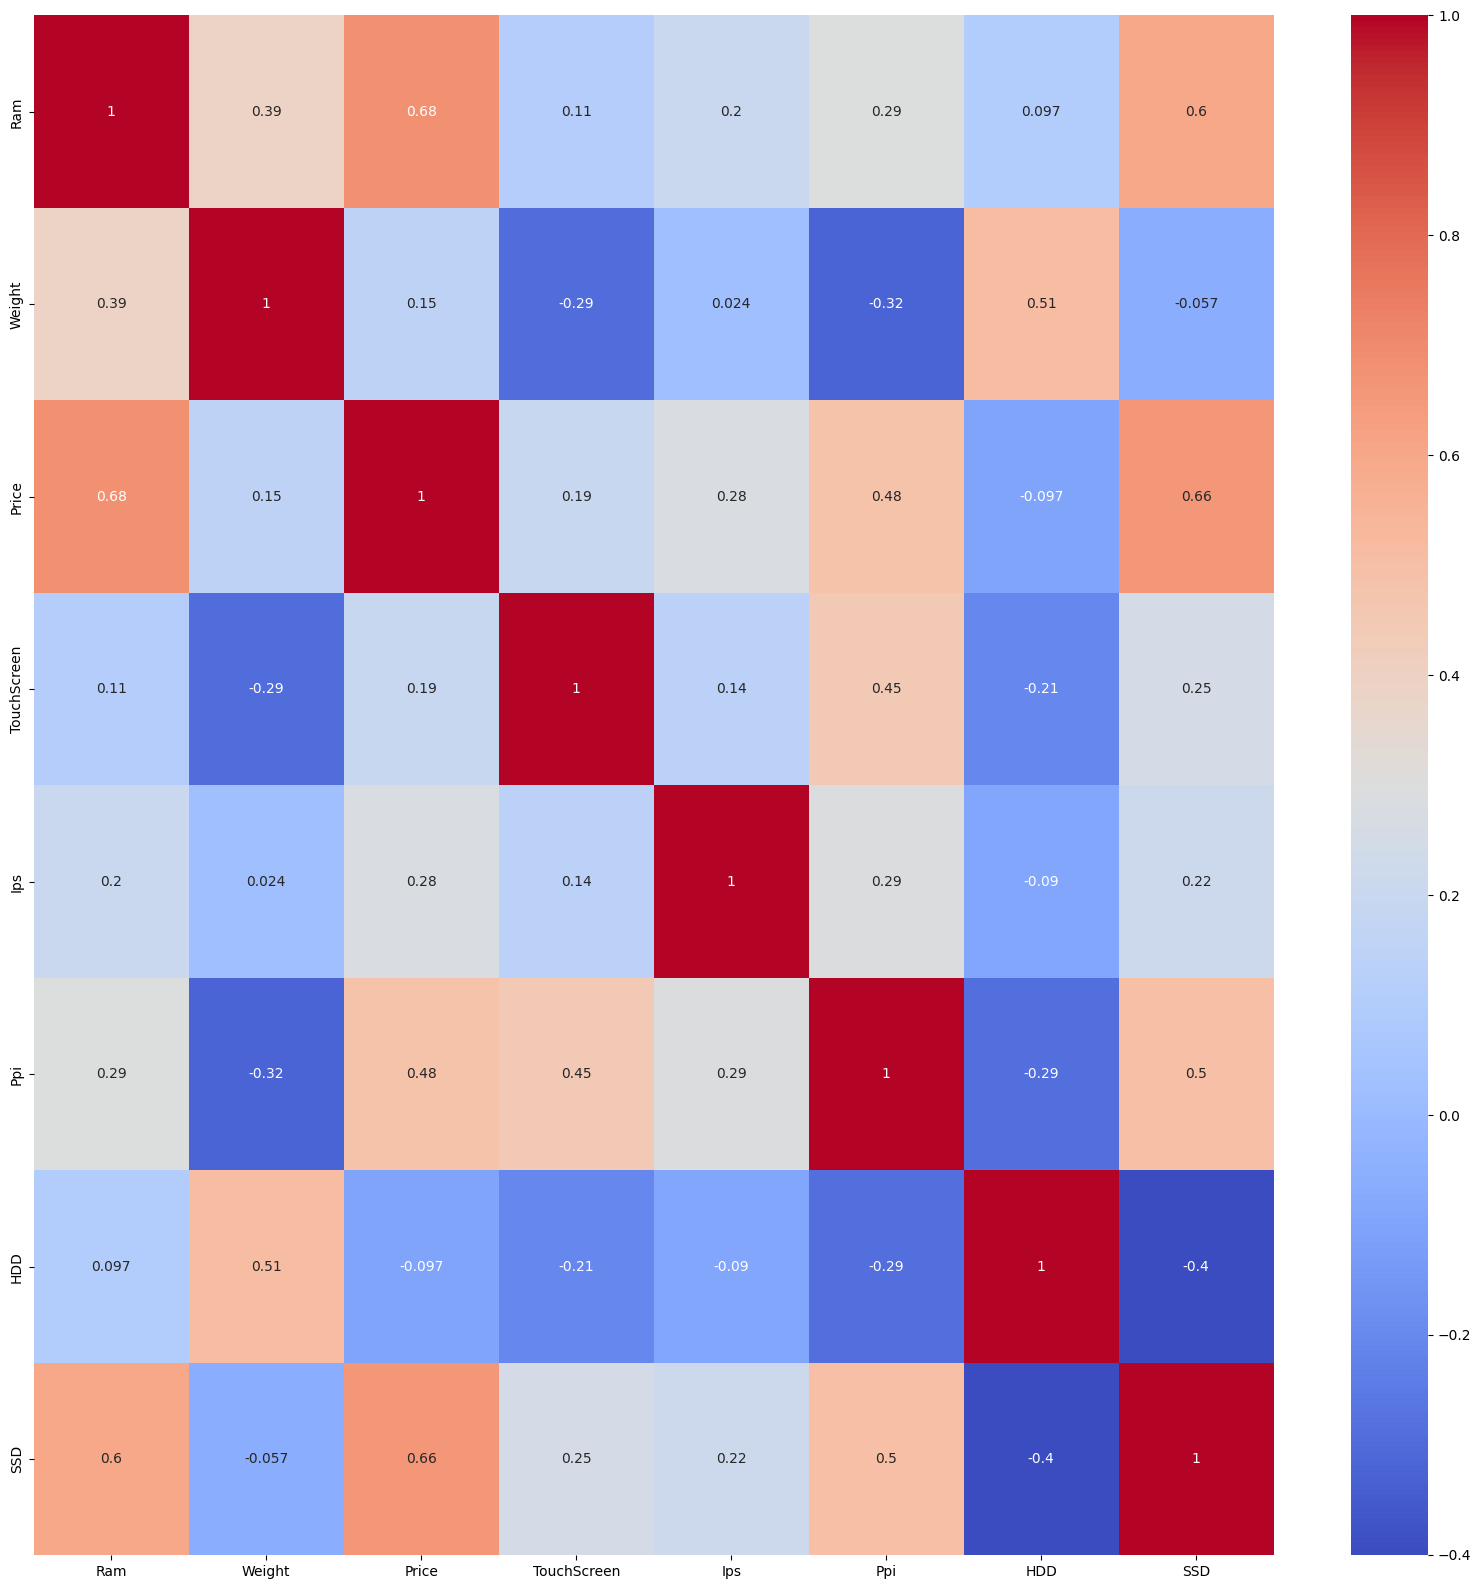

In [8]:
#Check correlation
cor=data[number.columns].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(cor, cmap='coolwarm',annot=True)
plt.show()

In [9]:
os_data=data['Os']
os_counts = os_data.value_counts().reset_index()
os_counts.columns = ['Os', 'Count']
fig = pt.pie(os_counts, values='Count', names='Os')
fig.show()
# the windows is the most Os used in laptop 

In [10]:
company_data=data['Company']
company_counts = company_data.value_counts().reset_index()
company_counts.columns = ['Company', 'Count']
fig = pt.pie(company_counts, values='Count', names='Company')
fig.show()
#most company names are dell , lenovo , HP

In [11]:
TypeName_data=data['TypeName']
TypeName_counts = TypeName_data.value_counts().reset_index()
TypeName_counts.columns = ['TypeName', 'Count']
fig = pt.pie(TypeName_counts, values='Count', names='TypeName',)
fig.show()
# the most type name is notebook

In [12]:
Cpu_brand_data=data['Cpu_brand']
Cpu_brand_counts = Cpu_brand_data.value_counts().reset_index()
Cpu_brand_counts.columns = ['Cpu_brand', 'Count']
fig = pt.pie(Cpu_brand_counts, values='Count', names='Cpu_brand',)
fig.show()
# the most repated cpu is intel core i7

In [13]:
Gpu_brand_data=data['Gpu_brand']
Gpu_brand_counts = Gpu_brand_data.value_counts().reset_index()
Gpu_brand_counts.columns = ['Gpu_brand', 'Count']
fig = pt.pie(Gpu_brand_counts, values='Count', names='Gpu_brand',)
fig.show()
# the intel gpu is the most freq

In [14]:
for i in number.columns:
    fig = pt.histogram(data,x=data[i])
    fig.show() 

In [15]:
'''
Checking for outliers
'''

'\nChecking for outliers\n'

In [16]:
for i in number.columns:
    fig = pt.box(data,x=data[i])
    fig.show() 

In [17]:
# remove some outlier
data=data[data['Ram']!=64]
data=data[data['Ppi']<300]
data=data[data['Weight']<4]
data

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


In [18]:
#prepare the data
x=data.drop(columns=["Price"])
y=data["Price"]
label_encoder = LabelEncoder()

for i in string.columns:
    x[i] = label_encoder.fit_transform(x[i])
standardscaler=StandardScaler()
x['HDD'] = (x['HDD'] - np.mean(x['HDD'])) / np.std(x['HDD'])
x['SSD'] = (x['SSD'] - np.mean(x['SSD'])) / np.std(x['SSD'])
x['Ppi'] = (x['Ppi'] - np.mean(x['Ppi'])) / np.std(x['Ppi'])


x

,Company,TypeName,Ram,Weight,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,1,4,8,1.37,0,1,2.132120,2,-0.780105,-0.282639,1,0
1,1,4,8,1.34,0,0,-0.451195,2,-0.780105,-0.999775,1,0
2,7,3,8,1.86,0,0,-0.099121,2,-0.780105,0.434496,1,1
3,1,4,16,1.83,0,1,1.964372,3,-0.780105,1.868767,0,0
4,1,4,8,1.37,0,1,2.132120,2,-0.780105,0.434496,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1268,2,3,4,2.20,0,0,-1.159379,3,0.187007,-0.999775,2,2
1269,10,0,4,1.80,1,1,0.320705,3,-0.780105,-0.282639,1,2
1270,10,0,16,1.30,1,1,3.408637,3,-0.780105,1.868767,1,2
1271,10,3,2,1.50,0,0,-0.860725,4,-0.780105,-0.999775,1,2


In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
# check the models
regressors = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'k-NN': KNeighborsRegressor()
}

# Train and evaluate each regressor
for name, reg in regressors.items():
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse}")
    print(f"{name} - R^2 Score: {r2}")
    print('-'*80)

Decision Tree - Mean Squared Error: 0.07909068677097347
Decision Tree - R^2 Score: 0.762456519277982
--------------------------------------------------------------------------------
Random Forest - Mean Squared Error: 0.049541501377399315
Random Forest - R^2 Score: 0.8512054812286562
--------------------------------------------------------------------------------
Gradient Boosting - Mean Squared Error: 0.049901544948621854
Gradient Boosting - R^2 Score: 0.8501241149311622
--------------------------------------------------------------------------------
k-NN - Mean Squared Error: 0.07101709547411271
k-NN - R^2 Score: 0.7867049998119396
--------------------------------------------------------------------------------
